In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk 
import string
from collections import Counter 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

In [19]:
df = pd.read_csv('data.csv')

In [20]:
df.head()

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [21]:
df.drop(columns = ['index'], inplace = True)

In [22]:
df.head()

,title,genre,summary
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [23]:
df['genre'].value_counts()

genre
thriller      1023
fantasy        876
science        647
history        600
horror         600
crime          500
romance        111
psychology     100
sports         100
travel         100
Name: count, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    4657 non-null   object
 1   genre    4657 non-null   object
 2   summary  4657 non-null   object
dtypes: object(3)
memory usage: 109.3+ KB


[Text(0, 0, 'fantasy'),
 Text(1, 0, 'science'),
 Text(2, 0, 'crime'),
 Text(3, 0, 'history'),
 Text(4, 0, 'horror'),
 Text(5, 0, 'thriller'),
 Text(6, 0, 'psychology'),
 Text(7, 0, 'romance'),
 Text(8, 0, 'sports'),
 Text(9, 0, 'travel')]

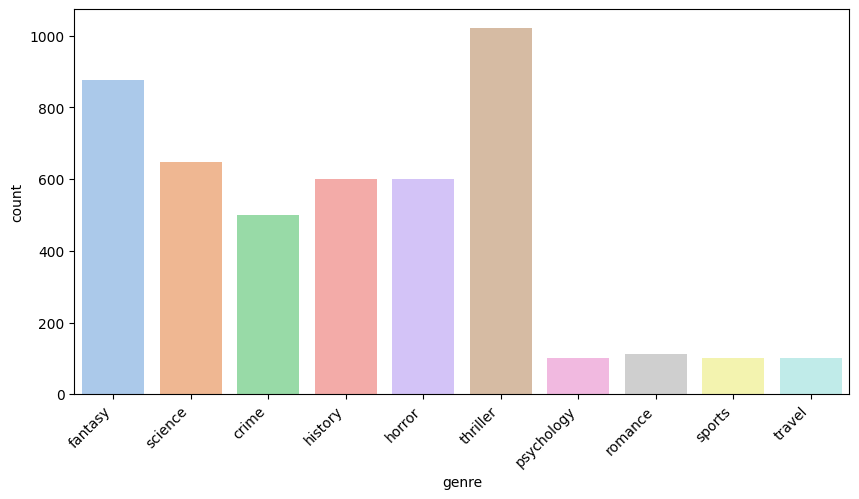

In [25]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x = df['genre'], palette = 'pastel', orient = 'h', )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [26]:
def clean_text(text):
    text = str(text).lower() # Lowering the case
    text = re.sub('\[.*?\]', '', text) #Remove any text in the square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) # Remove any links present 
    text = re.sub('<.*?>+', '', text) # 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    text = re.sub('\n', '', text) # Removing the next line character
    text = re.sub('\w*\d\w*', '', text) # Removing the words contaitning numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    return text

In [27]:
df['summary'] = df['summary'].apply(clean_text)

In [28]:
df.head()

,title,genre,summary
0,Drowned Wednesday,fantasy,drowned wednesday is the first trustee among ...
1,The Lost Hero,fantasy,as the book opens jason awakens on a school b...
2,The Eyes of the Overworld,fantasy,cugel is easily persuaded by the merchant fia...
3,Magic's Promise,fantasy,the book opens with heraldmage vanyel returni...
4,Taran Wanderer,fantasy,taran and gurgi have returned to caer dallben...


Text Preprocessing - removing stopwords and wordnets from the text by comparing from the nltk corpus

In [38]:
import os
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

import nltk

# Set the NLTK_DATA environment variable
os.environ['NLTK_DATA'] = './nltk_data/corpora/stopwords'  # Update the directory if needed

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer


[nltk_data] Downloading package punkt to /Users/davidcho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davidcho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/davidcho/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
print(nltk.data.path)


['/Users/davidcho/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.11/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.11/share/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.11/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [40]:
print(nltk.data.find('corpora/stopwords'))

/Users/davidcho/nltk_data/corpora/stopwords


In [41]:
lemma = WordNetLemmatizer()
stemmer = PorterStemmer()
def preprocess(text):
    words = word_tokenize(text)
    words = [lemma.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)

In [42]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/davidcho/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [43]:
preprocess(df['summary'][0])

'drown wednesday first truste among morrow day arthur side wish fulfil appear leviathanwhal suffer gluttoni book begin leaf visit arthur discuss invit drown wednesday sent arthur admit hospit damag done leg attempt enter tuesday treasur tower suddenli hospit room becom flood water two transport border sea hous leaf snatch away larg ship green sail known fli manti arthur remain bed medallion given immort call marin appar fail summon help arthur without hope eventu buoy mark pirat elishar feverfew treasur float toward soon arthur open hand mark bloodi red colour arthur red hand feverfew mark whoever found treasur identifi later long scaveng ship call moth rescu arthur board arthur go name arth introduc sunscorch first mate captain catapillow journey bring line storm border sea later pursu feverfew ghostli ship shiver damag inflict moth seriou therefor sunscorch command upper hous sorcer dr scamandro open transfer portal elsewher secondari realm scamandro claim arthur carri someth interf 

In [44]:
df['summary'] = df['summary'].apply(preprocess)

In [45]:
df.head()

,title,genre,summary
0,Drowned Wednesday,fantasy,drown wednesday first truste among morrow day ...
1,The Lost Hero,fantasy,book open jason awaken school bu unabl rememb ...
2,The Eyes of the Overworld,fantasy,cugel easili persuad merchant fianosth attempt...
3,Magic's Promise,fantasy,book open heraldmag vanyel return countri vald...
4,Taran Wanderer,fantasy,taran gurgi return caer dallben follow event t...


Encoding the labels using map function

In [46]:
books_list = list(df['genre'].unique())
encode = [i for i in range(len(books_list))]
mapper = dict(zip(books_list, encode))
print(mapper)

{'fantasy': 0, 'science': 1, 'crime': 2, 'history': 3, 'horror': 4, 'thriller': 5, 'psychology': 6, 'romance': 7, 'sports': 8, 'travel': 9}


In [47]:
df['genre'] = df['genre'].map(mapper)
df['genre'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Model building using count vectorizer and multinomial naive bayes

In [48]:
## Count vectorizer
count_vec = CountVectorizer(max_df = 0.9, min_df = 2, max_features = 1000, stop_words = 'english')
bagofword_vec = count_vec.fit_transform(df['summary'])
bagofword_vec

<4657x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 304529 stored elements in Compressed Sparse Row format>

In [49]:
test = df['genre']
X_train, X_test, y_train, y_test = train_test_split(bagofword_vec, test, test_size = 0.2)

In [50]:
X_train.shape,X_test.shape

((3725, 1000), (932, 1000))

In [51]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print(metrics.accuracy_score(y_test, svc_pred))

0.5439914163090128


In [52]:
mb = MultinomialNB()
mb.fit(X_train, y_train)
mb_pred = mb.predict(X_test)
print(metrics.accuracy_score(y_test, mb_pred))

0.6083690987124464


In [53]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test, rf.predict(X_test)))

0.5826180257510729


Using TF-IDF vectorizer and multinomial naive bayes

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['genre'])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df['summary'], y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((3725,), (932,))

In [56]:
# Using tf-idf

tfidf_vectorizer = TfidfVectorizer(max_df = 0.8, max_features= 10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
xtest_tfidf = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [57]:


svc = SVC()
svc.fit(xtrain_tfidf, y_train)



SVC()

In [58]:
svc_pred = svc.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test, svc_pred))

0.6427038626609443


In [59]:
mb = MultinomialNB()
mb.fit(xtrain_tfidf, y_train)
mb_pred = mb.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test, mb_pred))

0.5203862660944206


In [60]:
## mapping the training genre as well 
mapper

{'fantasy': 0,
 'science': 1,
 'crime': 2,
 'history': 3,
 'horror': 4,
 'thriller': 5,
 'psychology': 6,
 'romance': 7,
 'sports': 8,
 'travel': 9}

In [61]:
# Reverse mapper for output interpretation 
newmap = dict([(value, key) for key, value in mapper.items()])
newmap

{0: 'fantasy',
 1: 'science',
 2: 'crime',
 3: 'history',
 4: 'horror',
 5: 'thriller',
 6: 'psychology',
 7: 'romance',
 8: 'sports',
 9: 'travel'}

In [62]:
CF = metrics.confusion_matrix(y_test, svc_pred)
CF

array([[149,   9,   0,   4,   6,  23,   0,   4,   0,   1],
       [  7,  87,   0,   7,   2,  16,   1,   0,   0,   0],
       [  2,   1,  52,   2,   1,  51,   0,   0,   0,   0],
       [  7,   6,   2,  88,   0,  13,   0,   0,   1,   1],
       [ 12,   4,   1,   5,  45,  46,   0,   0,   0,   0],
       [  6,   6,   3,   3,   6, 174,   0,   0,   0,   0],
       [  2,  18,   0,   0,   0,   6,   0,   0,   0,   0],
       [  4,   0,   0,   0,   0,  13,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   7,   0,   0,   4,   0],
       [  5,   2,   0,   8,   0,   7,   0,   0,   0,   0]])

<Axes: >

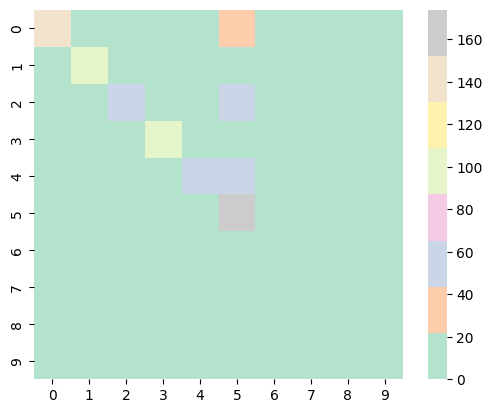

In [63]:
sns.heatmap(CF, cmap = 'Pastel2', fmt = '.2g', xticklabels = list(mapper.values()), cbar = True, square = True)

In [64]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories=list(mapper.values()),
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Pastel1',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [65]:
list(newmap.values())

['fantasy',
 'science',
 'crime',
 'history',
 'horror',
 'thriller',
 'psychology',
 'romance',
 'sports',
 'travel']

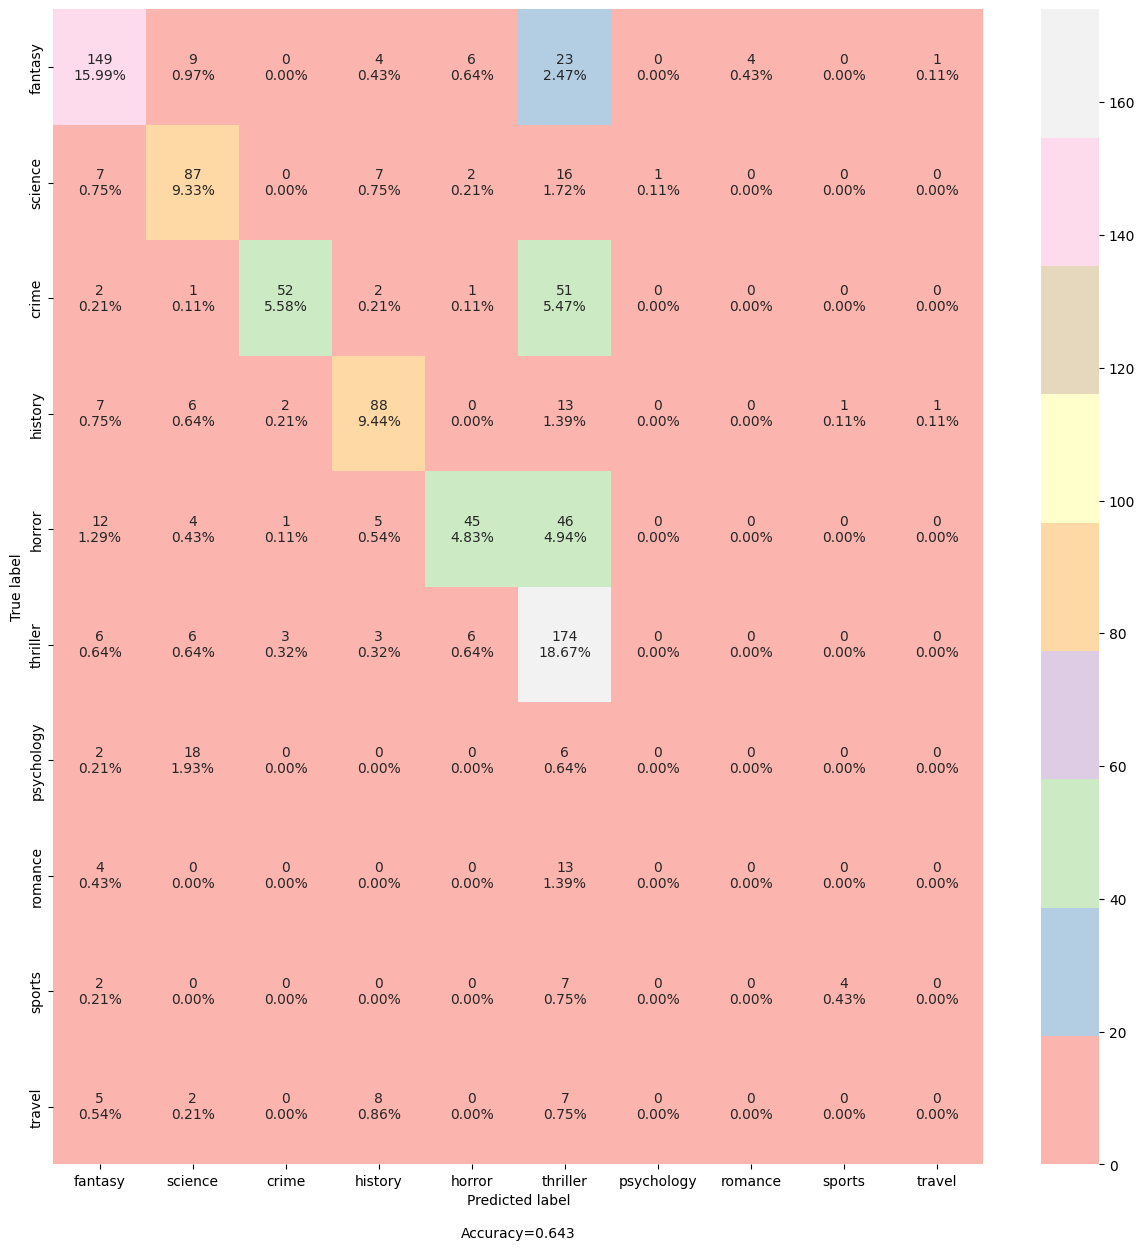

In [66]:
make_confusion_matrix(CF, figsize = (15,15), categories= list(mapper.keys()))